# This dataset report of the number of forest fires in Brazil divided by states. The series comprises the period of approximately 20 years (1998 to 2017).

In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import calendar

In [225]:
#df=pd.read_csv('amazon.csv')
#UnicodeDecodeError
df=pd.read_csv('amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

## General informations about our dataset

In [226]:
df.head(50)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [227]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [229]:
df.shape

(6454, 5)

In [230]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [231]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [232]:
df.duplicated().sum()

32

In [233]:
df.drop_duplicates(inplace=True)

## Mapping month names 

In [234]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [235]:
mapper={'Janeiro' : 'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July',
       'Agosto':'August', 'Setembro':'September', 'Outubro':'October', 'Novembro':'November', 'Dezembro':'December'}
df['month']=df['month'].map(mapper)

In [236]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

## Total Number of Fires Registered

In [237]:
int(df['number'].sum())

698811

## In Which Month Maximum Number of Forest Fires Were Reported?

In [238]:
x=df.groupby('month')['number'].sum().sort_values(ascending=False)
x.head(1)

month
July    92319.113
Name: number, dtype: float64

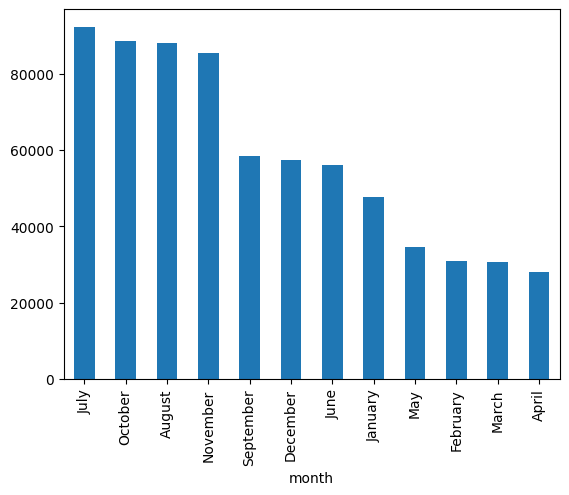

In [239]:
x.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## In Which Year Maximum Number of Forest Fires Was Reported?

In [240]:
x=df.groupby('year')['number'].sum().sort_values(ascending=False)
x.head(1)

year
2003    42760.674
Name: number, dtype: float64

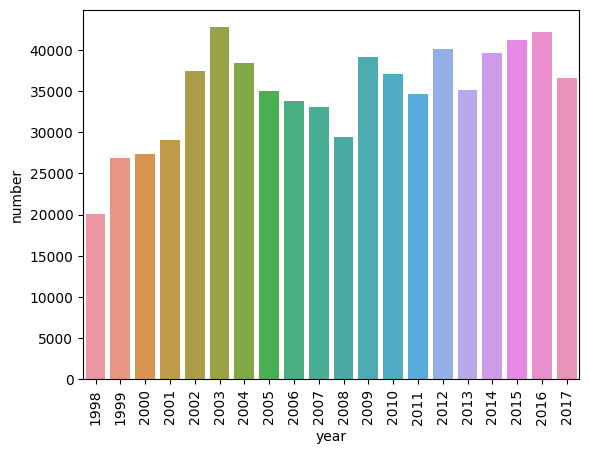

In [241]:
#x.plot(kind='bar')
sns.barplot(data=x.reset_index(),x='year',y='number')
plt.xticks(rotation=90)
plt.show()

## In Which State Maximum Number of Forest Fires Was Reported?

In [242]:
x=df.groupby('state')['number'].sum().sort_values(ascending=False)
x.head(1)

state
Mato Grosso    96246.028
Name: number, dtype: float64

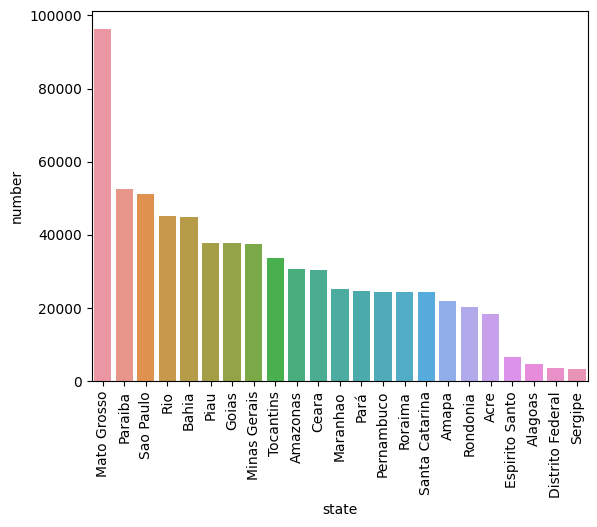

In [243]:
sns.barplot(data=x.reset_index(),x='state',y='number')
plt.xticks(rotation=90)
plt.show()

## Find Total Number of Fires Were Reported In Amazonas

In [244]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

## Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [245]:
x=df[df['state']=='Amazonas'].groupby("year")['number'].sum()
x

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

<AxesSubplot:xlabel='year', ylabel='number'>

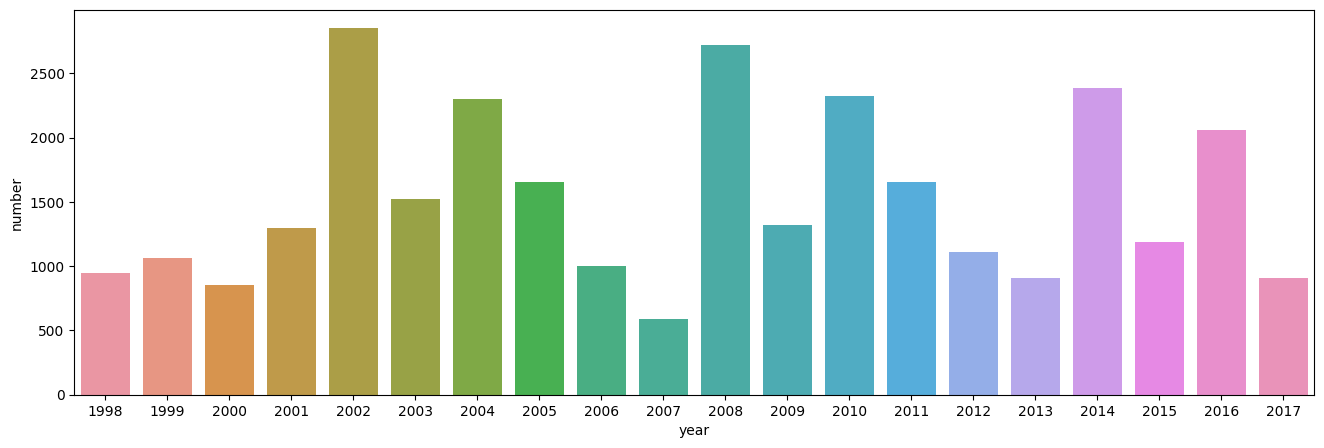

In [246]:
plt.figure(figsize=(16,5))
sns.barplot(data=x.reset_index(),x='year',y='number')

## Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [263]:
x=df[df['state']=='Amazonas']
x['day']=x['date']
x.loc[:,'day']=x['day'].apply(lambda row: calendar.day_name[row.dayofweek])

C:\Users\nidha\AppData\Local\Temp\ipykernel_7644\1685611222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['day']=x['date']
C:\Users\nidha\AppData\Local\Temp\ipykernel_7644\1685611222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,'day']=x['day'].apply(lambda row: calendar.day_name[row.dayofweek])


In [264]:
x.head()

,year,state,month,number,date,day
718,1998,Amazonas,January,0.0,1998-01-01,Thursday
719,1999,Amazonas,January,3.0,1999-01-01,Friday
720,2000,Amazonas,January,7.0,2000-01-01,Saturday
721,2001,Amazonas,January,3.0,2001-01-01,Monday
722,2002,Amazonas,January,17.0,2002-01-01,Tuesday


In [265]:
ax=x.groupby("day")['number'].sum()
sorter={'Friday':5,
'Monday': 1,   
'Saturday' :6,  
'Sunday' : 7 ,      
'Thursday':4,     
'Tuesday': 2,     
'Wednesday':3}
ax=ax.reset_index()
ax.loc[:,'order']=ax['day'].map(sorter)
ax

,day,number,order
0,Friday,5446.480,5
1,Monday,1886.601,1
2,Saturday,4162.666,6
3,Sunday,3015.186,7
4,Thursday,5754.802,4
5,Tuesday,6474.217,2
6,Wednesday,3910.177,3


<AxesSubplot:xlabel='day', ylabel='number'>

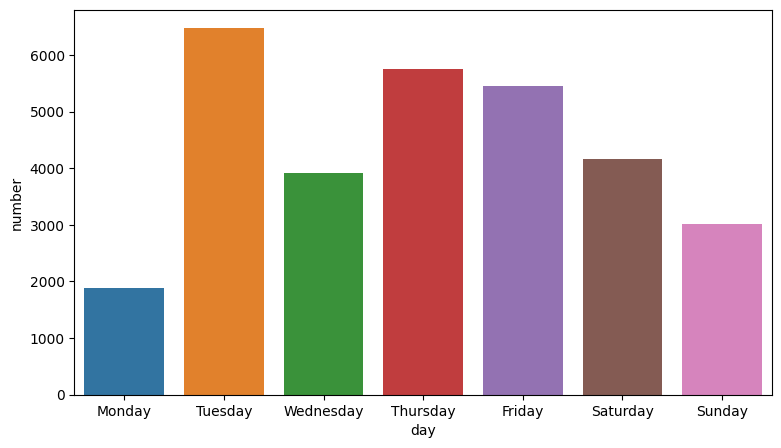

In [269]:
plt.figure(figsize=(9,5))
sns.barplot(data=ax.sort_values(by='order'),x='day',y='number')

## Find Total Number of Fires  Were Reported In 2015 And break Data Based on Each ‘Month’ 

In [278]:
x=df[df['year']==2015][['month','number']]
x=x.groupby('month')['number'].sum()
sorter={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
x=x.reset_index()
x.loc[:,'order']=x['month'].map(sorter)
x

,month,number,order
0,April,2573.000,4
1,August,4363.125,8
2,December,4088.522,12
3,February,2309.000,2
4,January,4635.000,1
5,July,4364.392,7
6,June,3260.552,6
7,March,2202.000,3
8,May,2384.000,5
9,November,4034.518,11


<AxesSubplot:xlabel='month', ylabel='number'>

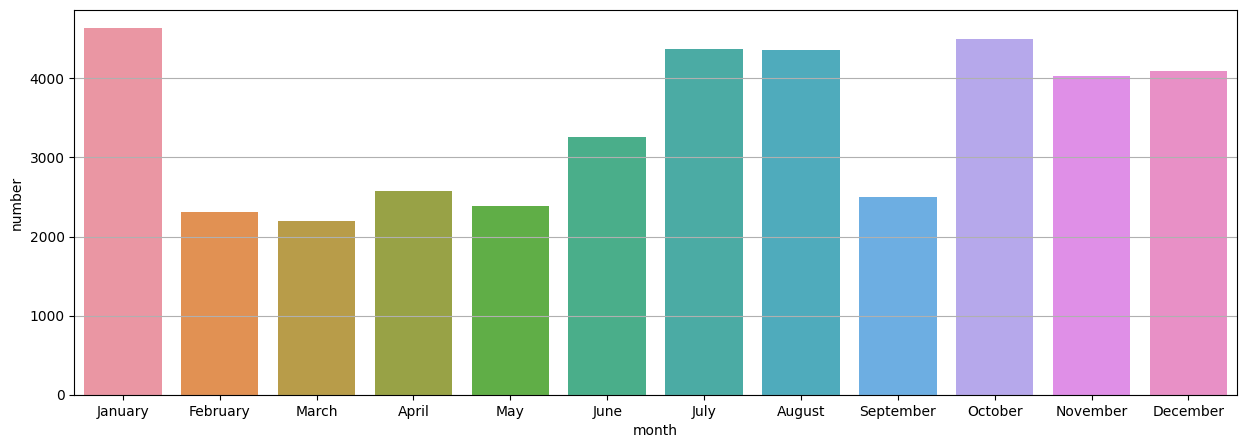

In [279]:
plt.figure(figsize=(15,5))
plt.grid()
sns.barplot(data=x.sort_values(by='order'),x='month',y='number')

## Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [212]:
df.groupby('state')['number'].mean().sort_values(ascending=False)


state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

<AxesSubplot:xlabel='state', ylabel='number'>

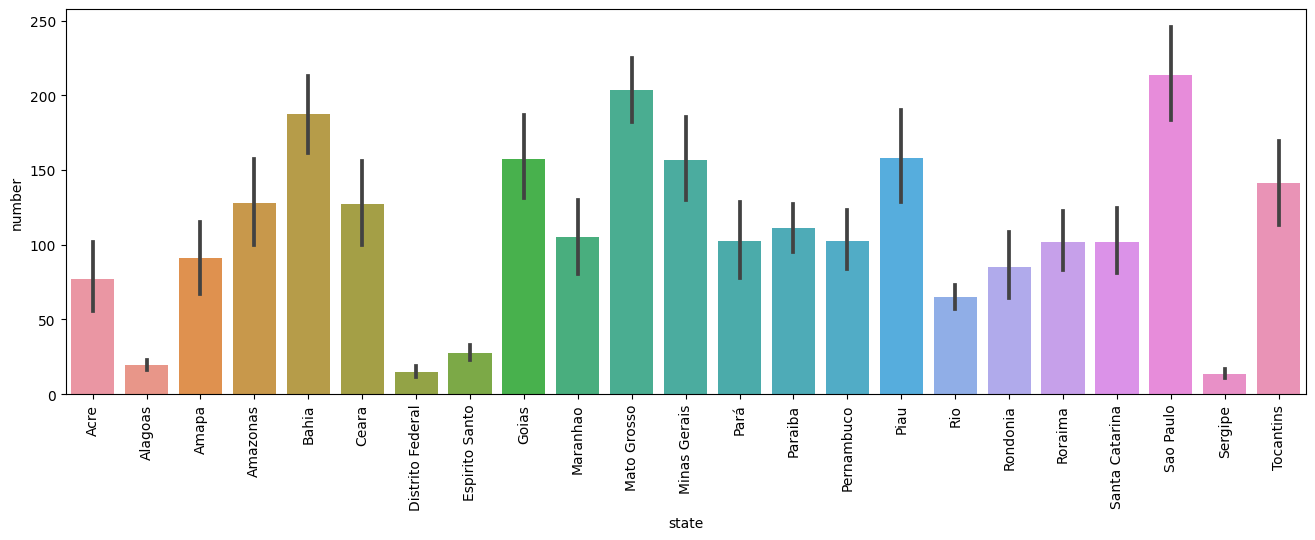

In [213]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='number')

## Find The State Names Where Fires Were Reported In 'december' Month

In [220]:
df[df['month']=='December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)